# Libraries Required:

In [6]:
import pandas as pd
import psycopg2 # communicates your SQL statements to your Postgres database
import sqlalchemy # generates SQL statements from python
import matplotlib.pyplot as plt

%matplotlib inline

# Connecting to Postgresql/ pdadmin4 server

In [7]:
from sqlalchemy import create_engine

postgres_username = 'postgres'
postgres_password = 'rennubabu'
postgres_address = 'localhost'
postgres_port = '5432'
postgres_dbname = 'course_data'
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username = postgres_username,
                       password = postgres_password, 
                       ipaddress = postgres_address, 
                       port = postgres_port, 
                       dbname = postgres_dbname))

# Create the connection
conn = create_engine(postgres_str)

# Writing the SQL query

In [8]:
dept_query = pd.read_sql_query(
"""
select department, 
count(*) as no_of_employees 
from employees 
group by department 
having count(*) > 40 
order by department;
""", conn)
dept_query.head()

,department,no_of_employees
0,Beauty,45
1,Children Clothing,47
2,Clothing,49
3,Computers,47
4,Device Repair,51


# Creating a Dataframe from the query

In [9]:
dept_df = pd.DataFrame(dept_query)
dept_df

,department,no_of_employees
0,Beauty,45
1,Children Clothing,47
2,Clothing,49
3,Computers,47
4,Device Repair,51
5,First Aid,58
6,Furniture,43
7,Garden,41
8,Jewelry,41
9,Movies,56


# Create a Visualization from the Dataframe

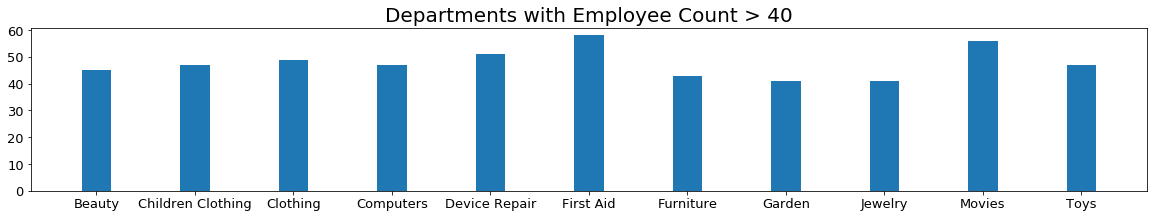

In [10]:
fig = plt.figure(figsize=(20, 3))  # width:20, height:3
plt.title("Departments with Employee Count > 40", fontsize = 20)
plt.bar(dept_df.department,dept_df.no_of_employees, align='center', width=0.3);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);

# Repeat for multiple queries, according to the task at hand

In [11]:
# Find the no. of male and female employees who work in Asia and Canada
regions_query = pd.read_sql_query(
"""
select * 
from employees
where region_id in (select region_id from regions where country in ('Asia','Canada'))
""", conn
)
regions_query.head()

,employee_id,first_name,last_name,email,hire_date,department,gender,salary,region_id
0,1,Berrie,Manueau,bmanueau0@dion.ne.jp,2006-04-20,Sports,F,154864,4
1,3,Sydney,Symonds,ssymonds2@hhs.gov,2010-05-17,Clothing,F,95313,4
2,4,Avrom,Rowantree,None,2014-08-02,Phones & Tablets,M,119674,7
3,5,Feliks,Morffew,fmorffew4@a8.net,2003-01-14,Computers,M,55307,5
4,7,Ardeen,Curwood,acurwood6@1und1.de,2006-02-19,Clothing,F,28995,7


In [12]:
regions_df = pd.DataFrame(regions_query)
regions_df.head()

,employee_id,first_name,last_name,email,hire_date,department,gender,salary,region_id
0,1,Berrie,Manueau,bmanueau0@dion.ne.jp,2006-04-20,Sports,F,154864,4
1,3,Sydney,Symonds,ssymonds2@hhs.gov,2010-05-17,Clothing,F,95313,4
2,4,Avrom,Rowantree,None,2014-08-02,Phones & Tablets,M,119674,7
3,5,Feliks,Morffew,fmorffew4@a8.net,2003-01-14,Computers,M,55307,5
4,7,Ardeen,Curwood,acurwood6@1und1.de,2006-02-19,Clothing,F,28995,7


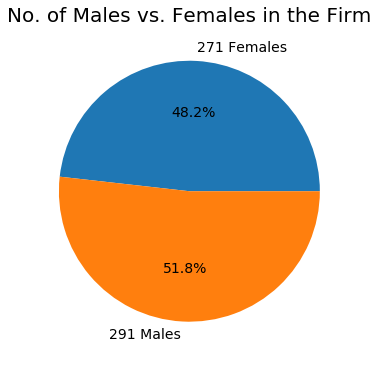

In [13]:
female_count = regions_df.loc[regions_df['gender'] == 'F'].count()[0]
male_count = regions_df.loc[regions_df['gender'] == 'M'].count()[0]

fig = plt.figure(figsize = (6,6))
plt.title("No. of Males vs. Females in the Firm", fontsize = 20)
plt.pie([female_count, male_count], labels = ['%r Females' % female_count, '%r Males' % male_count], textprops = {'fontsize' : 14}, autopct='%1.1f%%');

In [14]:
salary_query = pd.read_sql_query(
"""
select sum(case when salary < 100000 then 1 else 0 end) as employee,
sum(case when salary > 100000 and salary < 150000 then 1 else 0 end) as consultant,
sum(case when salary > 150000 then 1 else 0 end) as partner 
from employees
""", conn
)
print(salary_query)

   employee  consultant  partner
0       581         298      121


In [15]:
salary_df = pd.DataFrame(salary_query)
salary_df

,employee,consultant,partner
0,581,298,121


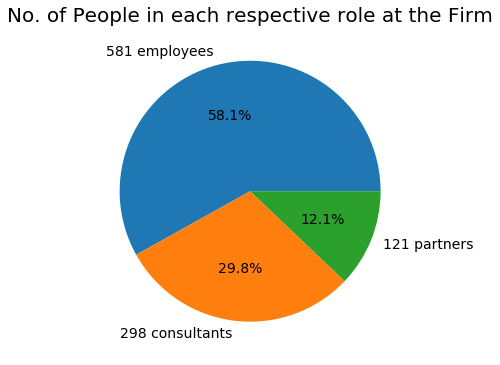

In [16]:
employee_count = salary_df.employee.max()
consultant_count = salary_df.consultant.max()
partner_count = salary_df.partner.max()
#print(employee_count, consultant_count, partner_count)

fig = plt.figure(figsize = (6,6))
plt.title("No. of People in each respective role at the Firm", fontsize = 20)
plt.pie([employee_count, consultant_count, partner_count], labels = ['%r employees' % employee_count, '%r consultants' % consultant_count, '%r partners' % partner_count], textprops = {'fontsize' : 14}, autopct='%1.1f%%');